In [1]:
#Motivation: https://github.com/rslim087a/PyTorch-for-Deep-Learning-and-Computer-Vision-Course-All-Codes-
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn as nn
from IPython import display

In [2]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [3]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

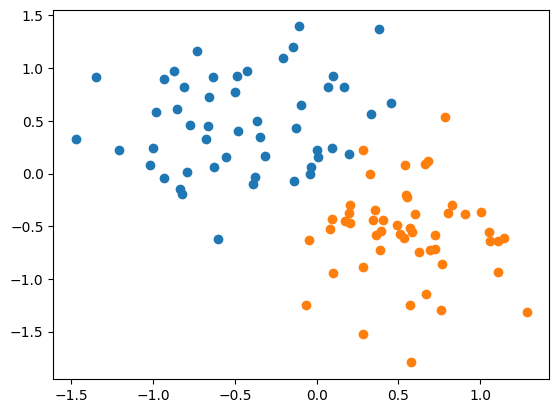

In [4]:
scatter_plot()

In [5]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.8:
            return 1
        else:
            return 0

In [6]:
torch.manual_seed(1)
model = Model(2, 1)

In [7]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
    return (w1.item(), w2.item(), b[0].item())

In [8]:
def plot_fit(title):
    plt.title(title)
    w1, w2, b1 = get_params()
    x1 = np.array([-1.5, 1.5])
    x2 = (w1*x1 + b1) / -w2
    scatter_plot()
    plt.plot(x1, x2, 'r')
    plt.show()
    display.clear_output(wait=True)

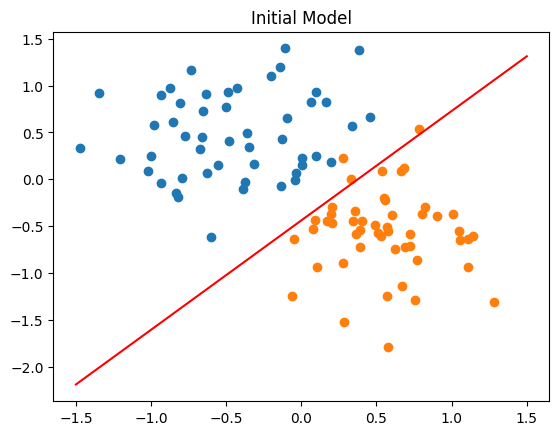

In [9]:
plot_fit('Initial Model')

In [10]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

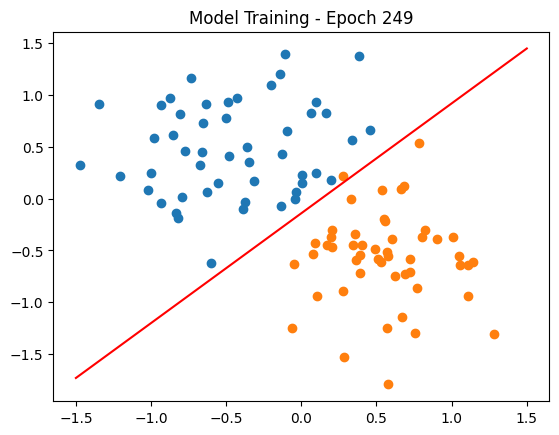

In [11]:
epochs = 250
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    plot_fit('Model Training - Epoch {}'.format(i))

    losses.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Text(0, 0.5, 'loss')

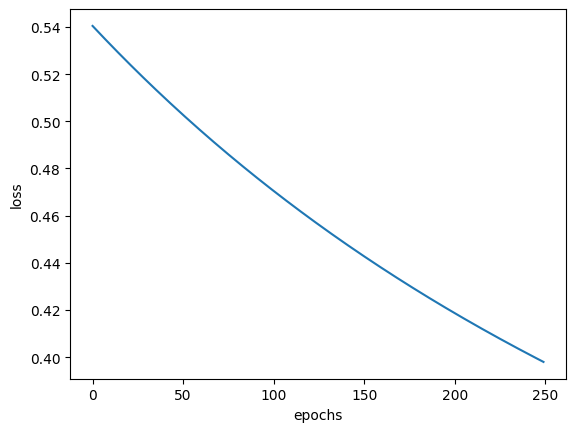

In [12]:
plt.plot(range(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('loss')

Red point probability: 0.8041152954101562
Black point probability: 0.16531342267990112
Red point class: 1
Black point class: 0


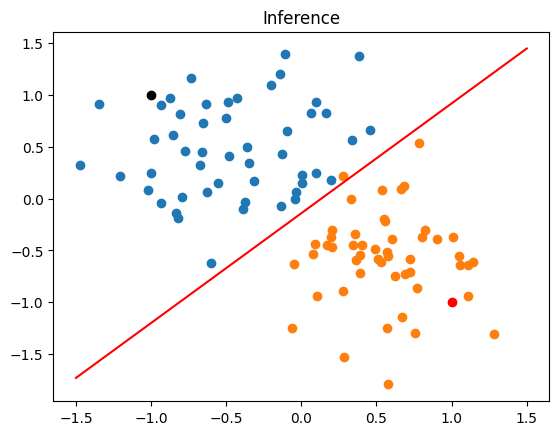

In [13]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point probability: {}".format(model.forward(point1).item()))
print("Black point probability: {}".format(model.forward(point2).item()))
print("Red point class: {}".format(model.predict(point1)))
print("Black point class: {}".format(model.predict(point2)))
plot_fit('Inference')